# Analysis of Era 2 Lyrics

In [1]:
import pandas as pd
import os
import re
import json
import requests
import random
from bs4 import BeautifulSoup
import lyricsgenius
from collections import Counter
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import WordPunctTokenizer

In [2]:
%run functions.ipynb

In [3]:
era_2 = json.load(open('../data/clean_era_2.json'))

__Word frequency counters__

In [4]:
word_freq_e2 = Counter()
song_freq_e2 = Counter()

for song in era_2:
    if song.get('tokens'):
        tokens = song['tokens']
        word_freq_e2.update(tokens)
        set_tokens = set(tokens)   
        song_freq_e2.update(set_tokens)

In [5]:
print('Top 50 types in Era 2 corpus\n', '='*34, sep='')
print(word_freq_e2.most_common(50))

print('\n\nTop 50 types in Era 2 songs (num of songs type occurs in)\n', '='*51, sep='')
print(song_freq_e2.most_common(50))

Top 50 types in Era 2 corpus
[('i', 1191), ('you', 1178), ('the', 844), ('and', 704), ('it', 444), ('me', 435), ('to', 427), ('in', 417), ('a', 402), ('my', 378), ('we', 345), ('of', 256), ('this', 242), ('oh', 242), ('all', 232), ('like', 229), ('but', 220), ('that', 212), ('is', 203), ("it's", 196), ('so', 192), ('your', 185), ("i'm", 180), ('love', 173), ('know', 170), ('was', 169), ('be', 167), ('are', 159), ('just', 158), ('on', 158), ('never', 154), ('now', 137), ("don't", 136), ('what', 136), ('with', 135), ('want', 132), ('out', 120), ('time', 118), ('when', 115), ('back', 111), ('for', 110), ('do', 109), ("'cause", 108), ('got', 108), ('up', 105), ('if', 102), ('at', 101), ('they', 93), ('one', 90), ('baby', 89)]


Top 50 types in Era 2 songs (num of songs type occurs in)
[('the', 65), ('you', 64), ('and', 64), ('to', 64), ('i', 63), ('a', 63), ('me', 62), ('in', 61), ('it', 57), ('my', 57), ('but', 55), ('of', 53), ('like', 53), ('your', 50), ('so', 47), ('all', 46), ('just',

__Creating stop word list and filtering the word frequency counters__

In [6]:
from nltk.corpus import stopwords
stoplist=stopwords.raw('english').split('\n')
print('Stop contains', len(stoplist), 'words, such as: \n\n',stoplist[:10])

Stop contains 180 words, such as: 

 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [7]:
filtered_word_freq_e2 = Counter()
for word, freq in word_freq_e2.most_common():

    if word not in stoplist:
        filtered_word_freq_e2.update({word:freq})
        
filtered_song_freq_e2 = Counter()
for word, freq in song_freq_e2.most_common():

    if word not in stoplist:
        filtered_song_freq_e2.update({word:freq})

In [8]:
print('Top 50 types in Era 2 lyrics\n', '='*34, sep='')
print(filtered_word_freq_e2.most_common(50))

print('\n\nTop 50 types in Era 2 songs (num of songs type occurs in)\n', '='*51, sep='')
print(filtered_song_freq_e2.most_common(50))

Top 50 types in Era 2 lyrics
[('oh', 242), ('like', 229), ("i'm", 180), ('love', 173), ('know', 170), ('never', 154), ('want', 132), ('time', 118), ('back', 111), ("'cause", 108), ('got', 108), ('one', 90), ('baby', 89), ('say', 87), ('look', 86), ('yeah', 85), ('oh oh', 84), ('go', 81), ('see', 81), ('think', 80), ('shake', 80), ('right', 78), ('could', 78), ('stay', 74), ('ever', 72), ('made', 72), ('ey', 72), ('get', 71), ('new', 68), ('ooh', 68), ('bad', 68), ('home', 67), ('yet?', 67), ("i'd", 66), ('wish', 66), ('wanna', 66), ('would', 61), ('good', 57), ('night', 57), ("that's", 56), ('call', 55), ('take', 55), ('tell', 54), ("i'll", 54), ('gonna', 54), ('come', 51), ("we're", 50), ('better', 50), ('said', 50), ('last', 48)]


Top 50 types in Era 2 songs (num of songs type occurs in)
[('like', 53), ("i'm", 40), ('oh', 40), ('know', 39), ("'cause", 38), ('back', 37), ('time', 34), ('say', 33), ('love', 31), ('never', 31), ('go', 29), ('could', 28), ('one', 28), ('night', 27), ('g

__Word count__

In [9]:
word_cnt_e2 = []
for x in range(len(era_2)):
    song_1 = era_2[x]['lyrics']
    song1 = song_1.replace('\n',' ')
    song1_split = song1.split(" ")
    song1_cnt = len(song1_split)
    word_cnt_e2.append(song1_cnt)
print(word_cnt_e2)

[284, 306, 282, 421, 488, 405, 295, 391, 348, 497, 296, 197, 361, 505, 353, 351, 363, 339, 437, 359, 521, 403, 676, 466, 627, 612, 500, 380, 433, 408, 361, 358, 469, 427, 476, 467, 485, 495, 531, 574, 409, 571, 504, 453, 512, 416, 527, 394, 306, 469, 271, 440, 313, 411, 535, 509, 393, 447, 460, 276, 332, 361, 400, 175, 500]


In [10]:
avg_word_cnt_e2 = sum(word_cnt_e2)/len(era_2)
print(avg_word_cnt_e2)

420.4769230769231


__Creating a list of "target words"__

In [11]:
target_words = ['you','i','me','love','baby','break','lover','kiss','truck','mama',
               'heart','friends', 'friend','new','home','bad',"can't",'alone','know']

In [12]:
print("{:<10} {:<10} {:<10}".format("target word", "word freq", "song freq"))
print("="*30)

target_word_freq_e2=[]
target_song_freq_e2=[]
for word in target_words:
    print("{:<10} {:<10} {:<10}".format(word,
                        word_freq_e2.get(word,0),
                        song_freq_e2.get(word,0)))
    target_word_freq_e2.append(word_freq_e2.get(word,0))
    target_song_freq_e2.append(song_freq_e2.get(word,0))

target word word freq  song freq 
you        1178       64        
i          1191       63        
me         435        62        
love       173        31        
baby       89         17        
break      36         10        
lover      8          3         
kiss       12         8         
truck      0          0         
mama       1          1         
heart      26         8         
friends    23         9         
friend     14         3         
new        68         18        
home       67         19        
bad        68         15        
can't      35         17        
alone      25         16        
know       170        39        


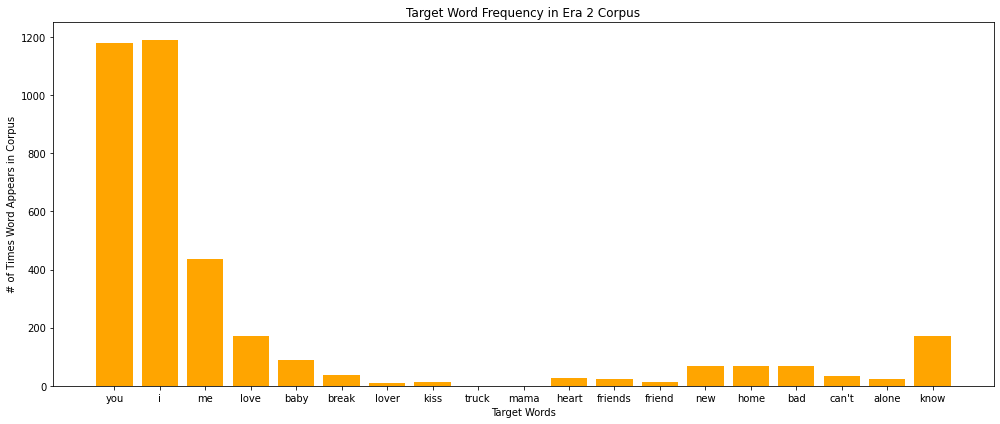

In [13]:
plt.figure(figsize=(14, 6))
plt.bar(target_words,target_word_freq_e2, color='orange')
plt.title('Target Word Frequency in Era 2 Corpus')
plt.ylabel('# of Times Word Appears in Corpus')
plt.xlabel('Target Words')
plt.tight_layout()
plt.show()

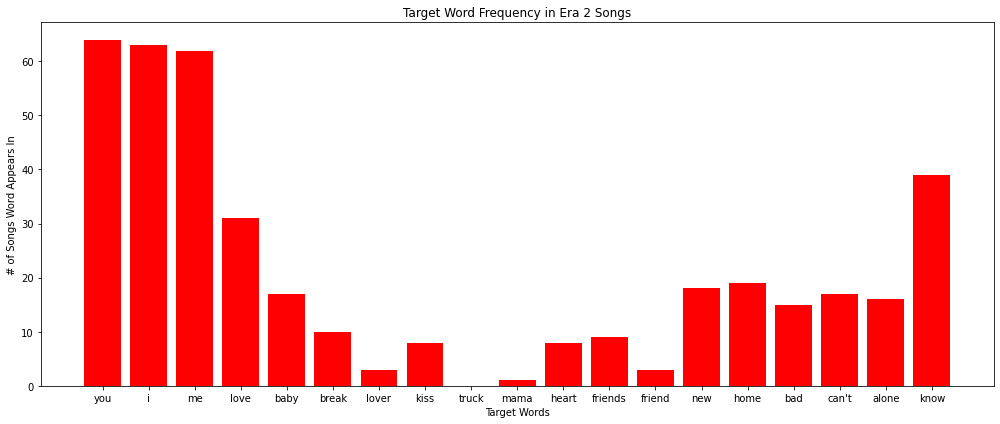

In [14]:
plt.figure(figsize=(14, 6))
plt.bar(target_words,target_song_freq_e2, color='red')
plt.title('Target Word Frequency in Era 2 Songs')
plt.ylabel('# of Songs Word Appears In')
plt.xlabel('Target Words')
plt.tight_layout()
plt.show()

# Type-Token-Ratio

In [15]:
ttr_e2 = []
for x in range(len(era_2)):
    numtokens = len(era_2[x]['tokens'])
    types = sorted(set(era_2[x]['tokens']))
    numtypes = len(types)
    ttr = float(numtypes)/numtokens
    ttr_e2.append(ttr)

In [16]:
avg_ttr_cnt_e2 = sum(ttr_e2)/len(era_2)
print(avg_ttr_cnt_e2)

0.3180601163379313


In [17]:
len(era_2)

65

In [18]:
era_2

[{'lyrics': "[Verse 1]\nI'm walking fast through the traffic lights\nBusy streets and busy lives\nAnd all we know, is touch and go\nWe are alone with our changing minds\nWe fall in love 'til it hurts or bleeds, or fades in time\n\n[Chorus]\nAnd I never saw you coming\nAnd I’ll never be the same\n\n[Verse 2]\nYou come around and the armor falls\nPierce the room like a cannon ball\nNow all we know, is don’t let go\nWe are alone, just you and me\nUp in your room and our slates are clean\nJust twin fire signs, four blue eyes\n\n[Pre-Chorus]\nSo you were never a saint\nAnd I've loved in shades of wrong\nWe learn to live with the pain\nMosaic broken hearts\nBut this love is brave and wild\n\n[Chorus]\nAnd I never (Never) saw you coming\nAnd I’ll never (Never) be the same\n\n[Bridge]\nThis is a state of grace\nThis is the worthwhile fight\nLove is a ruthless game\nUnless you play it good and right\nThese are the hands of fate\nYou’re my Achilles heel\nThis is the golden age of something good\